In [16]:
from simulator import NetworkSimulator
from packetrouter import QPacketRouter, RIPPacketRouter
from matplotlib import pyplot as plt

In [17]:
NUM_NODES = 25
NUM_PACKETS = 2000000

In [18]:
def get_averages(total_times, kernel_size):
    return [sum(total_times[i*kernel_size:(i+1)*kernel_size])/kernel_size for i in range(int(len(total_times) / kernel_size))]

In [19]:
n_s = NetworkSimulator(NUM_NODES)
q_packet_router = QPacketRouter(n_s)
rip_packet_router = RIPPacketRouter(n_s)

test_packets = n_s.generate_packets(NUM_PACKETS)
kernel_size = 10000

print("RIP routing: ")
n_s.simulate_network_load(test_packets, rip_packet_router, verbose=True)

total_times = [packet.totalTime for packet in test_packets]
rip_average_times = get_averages(total_times, kernel_size)

for packet in test_packets: packet.reset()

print("Q-Routing:")
n_s.simulate_network_load(test_packets, q_packet_router, verbose=True)

total_times = [packet.totalTime for packet in test_packets]
q_average_times = get_averages(total_times, kernel_size)

RIP routing: 
 avg path length:       3.344413
 avg transmission time: 381.552246
 dropped packets:       10891 / 2000000
Q-Routing:
 avg path length:       4.372659
 avg transmission time: 355.559658
 dropped packets:       15477 / 2000000


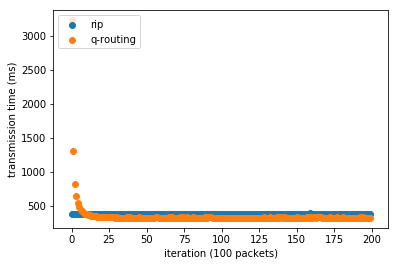

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(len(q_average_times)), rip_average_times, label="rip")
ax1.scatter(range(len(q_average_times)), q_average_times, label="q-routing")
plt.legend(loc='upper left')
plt.ylabel("transmission time (ms)")
plt.xlabel("iteration (100 packets)")
plt.savefig('random-vs-qrouting.png', dpi=300)